In [25]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 29 13:20:49 2019

@author: lilik.pratama
"""

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import model_selection
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dataset = pd.read_csv("d:\dqlab_x_efishery\FAB15\data1.csv")

In [9]:
# shape
print(dataset.shape)

# class distribution
print(dataset.groupby('label').size())

print(dataset.head(10))

(4576, 4)
label
0    2288
1    2288
dtype: int64
   x    y   z  label
0  0  251  49      1
1  0  253  49      1
2 -1  251  47      1
3 -3  251  44      1
4 -2  247  44      1
5 -2  244  43      1
6 -1  240  41      1
7 -1  239  39      1
8 -1  239  38      1
9 -1  240  41      1


In [26]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
Y = array[:,3]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [27]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.564754 (0.042889)
LDA: 0.568306 (0.041902)
KNN: 0.815027 (0.018493)
CART: 0.797541 (0.017126)
NB: 0.804098 (0.014357)
SVM: 0.832240 (0.013672)


0.8253275109170306
[[395  51]
 [109 361]]
             precision    recall  f1-score   support

          0       0.78      0.89      0.83       446
          1       0.88      0.77      0.82       470

avg / total       0.83      0.83      0.82       916



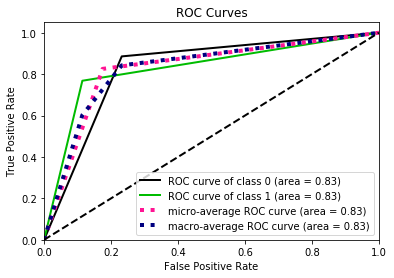

In [28]:
# Make predictions on validation dataset
svmodel = SVC()
svmodel.fit(X_train, Y_train)
predictions = svmodel.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

y_true = np.array(Y_validation)[:,None]
y_probas = np.array(predictions)[:,None]
y_probas = np.concatenate((1-y_probas,y_probas),axis=1)
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

# Model Tuning

## Standardized Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# list down features based on type
X_new = dataset.iloc[:, :3]
Y_new = dataset.iloc[:, 3]

# fit scaler on numeric features
ss.fit(X_new)

# scale numeric features now
X_scale = ss.transform(X_new)
X_new = pd.DataFrame(X_scale)

# Combine to new data frame

new_dataset = pd.concat([X_new, Y_new], axis=1)

In [20]:
# Split-out validation dataset
array = new_dataset.values
X_tune = array[:,0:3]
Y_tune = array[:,3]

validation_size = 0.20
seed = 7
X_train_new, X_validation_new, Y_train_new, Y_validation_new = model_selection.train_test_split(X_tune, Y_tune, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [21]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.568579 (0.041928)
LDA: 0.568306 (0.041902)
KNN: 0.818579 (0.020196)
CART: 0.798634 (0.017625)
NB: 0.804098 (0.014357)
SVM: 0.837158 (0.010805)


0.8220524017467249
[[410  36]
 [127 343]]
             precision    recall  f1-score   support

        0.0       0.76      0.92      0.83       446
        1.0       0.91      0.73      0.81       470

avg / total       0.84      0.82      0.82       916



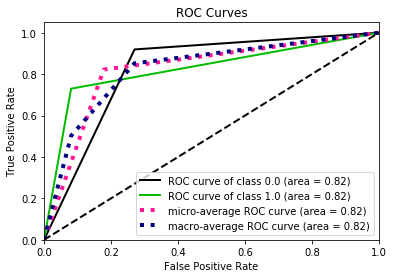

In [29]:
# Make predictions on validation dataset
svmodel = SVC()
svmodel.fit(X_train_new, Y_train_new)
predictions = svmodel.predict(X_validation_new)
print(accuracy_score(Y_validation_new, predictions))
print(confusion_matrix(Y_validation_new, predictions))
print(classification_report(Y_validation_new, predictions))

y_true = np.array(Y_validation_new)[:,None]
y_probas = np.array(predictions)[:,None]
y_probas = np.concatenate((1-y_probas,y_probas),axis=1)
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

## MinMax Scaling 

In [3]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

# list down features based on type
X_new = dataset.iloc[:, :3]
Y_new = dataset.iloc[:, 3]

# fit scaler on numeric features
mms.fit(X_new)

# scale numeric features now
X_scale = mms.transform(X_new)
X_new = pd.DataFrame(X_scale)

# Combine to new data frame

new_dataset = pd.concat([X_new, Y_new], axis=1)

In [5]:
# Split-out validation dataset
array = new_dataset.values
X_tune = array[:,0:3]
Y_tune = array[:,3]

validation_size = 0.20
seed = 7
X_train_new, X_validation_new, Y_train_new, Y_validation_new = model_selection.train_test_split(X_tune, Y_tune, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [6]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.572678 (0.065815)
LDA: 0.568306 (0.041902)
KNN: 0.813661 (0.012862)
CART: 0.796995 (0.018412)
NB: 0.804098 (0.014357)
SVM: 0.495082 (0.037459)


## Robust Scaling

In [9]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

# list down features based on type
X_new = dataset.iloc[:, :3]
Y_new = dataset.iloc[:, 3]

# fit scaler on numeric features
rs.fit(X_new)

# scale numeric features now
X_scale = rs.transform(X_new)
X_new = pd.DataFrame(X_scale)

# Combine to new data frame

new_dataset = pd.concat([X_new, Y_new], axis=1)

In [10]:
# Split-out validation dataset
array = new_dataset.values
X_tune = array[:,0:3]
Y_tune = array[:,3]

validation_size = 0.20
seed = 7
X_train_new, X_validation_new, Y_train_new, Y_validation_new = model_selection.train_test_split(X_tune, Y_tune, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [11]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.568579 (0.041928)
LDA: 0.568306 (0.041902)
KNN: 0.815847 (0.016127)
CART: 0.798361 (0.018961)
NB: 0.804098 (0.014357)
SVM: 0.840164 (0.013620)


0.8220524017467249
[[410  36]
 [127 343]]
             precision    recall  f1-score   support

        0.0       0.76      0.92      0.83       446
        1.0       0.91      0.73      0.81       470

avg / total       0.84      0.82      0.82       916



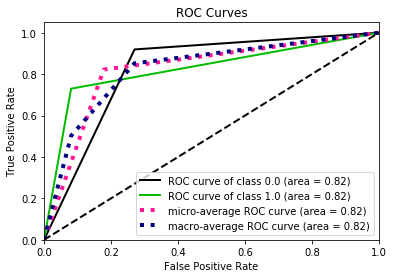

In [24]:
# Make predictions on validation dataset
svmmodel = SVC()
svmmodel.fit(X_train_new, Y_train_new)
predictions = svmmodel.predict(X_validation_new)
print(accuracy_score(Y_validation_new, predictions))
print(confusion_matrix(Y_validation_new, predictions))
print(classification_report(Y_validation_new, predictions))

y_true = np.array(Y_validation_new)[:,None]
y_probas = np.array(predictions)[:,None]
y_probas = np.concatenate((1-y_probas,y_probas),axis=1)
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

## Hyperparameter Tuning 

In [23]:
from sklearn.model_selection import GridSearchCV
# setting the parameter grid
grid_parameters = {'kernel': ['linear', 'rbf', 'poly'],
 'gamma': [1e-3, 1e-4],
 'C': [100, 250, 500, 1000]}
# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(SVC(random_state=seed), grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train_new, Y_train_new)
# view accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
 print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV:

0.55710 (+/-0.01737) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.65137 (+/-0.02822) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.50355 (+/-0.00133) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.55710 (+/-0.01737) for {'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}
0.55137 (+/-0.01747) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.50328 (+/-0.00055) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.55710 (+/-0.01737) for {'C': 250, 'gamma': 0.001, 'kernel': 'linear'}
0.70246 (+/-0.01655) for {'C': 250, 'gamma': 0.001, 'kernel': 'rbf'}
0.50355 (+/-0.00133) for {'C': 250, 'gamma': 0.001, 'kernel': 'poly'}
0.55710 (+/-0.01737) for {'C': 250, 'gamma': 0.0001, 'kernel': 'linear'}
0.55273 (+/-0.01691) for {'C': 250, 'gamma': 0.0001, 'kernel': 'rbf'}
0.50328 (+/-0.00055) for {'C': 250, 'gamma': 0.0001, 'kernel': 'poly'}
0.55710 (+/-0.01737) for {'C': 500, 'gamma': 0.001, 'kernel': 'li

In [30]:
import scipy
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': scipy.stats.expon(scale=10),
 'gamma': scipy.stats.expon(scale=.1),
 'kernel': ['rbf', 'linear']}
random_search = RandomizedSearchCV(SVC(random_state=seed), param_distributions=param_grid,
 n_iter=50, cv=5)
random_search.fit(X_train_new, Y_train_new)
print("Best parameters set found on development set:")
random_search.best_params_

Best parameters set found on development set:


{'C': 0.41662817327381985, 'gamma': 0.7718643683396714, 'kernel': 'rbf'}

In [32]:
# get best model, predict and evaluate performance
rs_best = random_search.best_estimator_
rs_predictions = rs_best.predict(X_validation_new)
print(accuracy_score(Y_validation_new, rs_predictions))
print(confusion_matrix(Y_validation_new, rs_predictions))
print(classification_report(Y_validation_new, rs_predictions))

0.8307860262008734
[[405  41]
 [114 356]]
             precision    recall  f1-score   support

        0.0       0.78      0.91      0.84       446
        1.0       0.90      0.76      0.82       470

avg / total       0.84      0.83      0.83       916

